In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from math import log10

## Image denoising

Với giả thiết ảnh bị ảnh hưởng bởi nhiễu trắng có trung bình bằng 0, có thể thực hiện khử nhiễu bằng cách chụp nhiều ảnh cùng một góc nhìn rồi cộng lại chia trung bình để khử nhiễu. Một phương pháp đơn giản hơn mà không cần chụp nhiều ảnh dựa trên quan sát là trong các bức ảnh thường có những vật có tính lặp lại nhiều lần trong ảnh. Vậy nên có thể dễ dàng khử nhiễu cho các vật có tính chất như thế. Phương pháp đó gọi là *non-local means denoising*.

Cụ thể ý tưởng chính của phương pháp này là với pixel ảnh $p$, và mọi pixel $q$ khác trong ảnh. Thực hiện tính độ tương quan $k(p,q)$ giữa $p$ và $q$ thông qua so sánh patch ảnh xung quanh $p$, $q$. Sau đó, màu tại pixel $p$ sẽ được xác định bằng tổng $\sum_q{k(p,q)v_q}$

Các hàm trong OpenCV cài đặt cho phương pháp khử nhiễu này:
* `fastNlMeansDenoising` - khử nhiễu với ảnh gray scale
* `fastNlMeansDenoisingColored` - khử nhiễu với ảnh màu
* `fastNlMeansDenoisingMulti` - khử nhiễu với video gray scale
* `fastNlMeansDenoisingColoredMulti` - khử nhiễu với video màu

PSNR using gauss filter = 26.5970
PSNR using median filter = 24.9978
PSNR using non-local means denoising = 25.0407


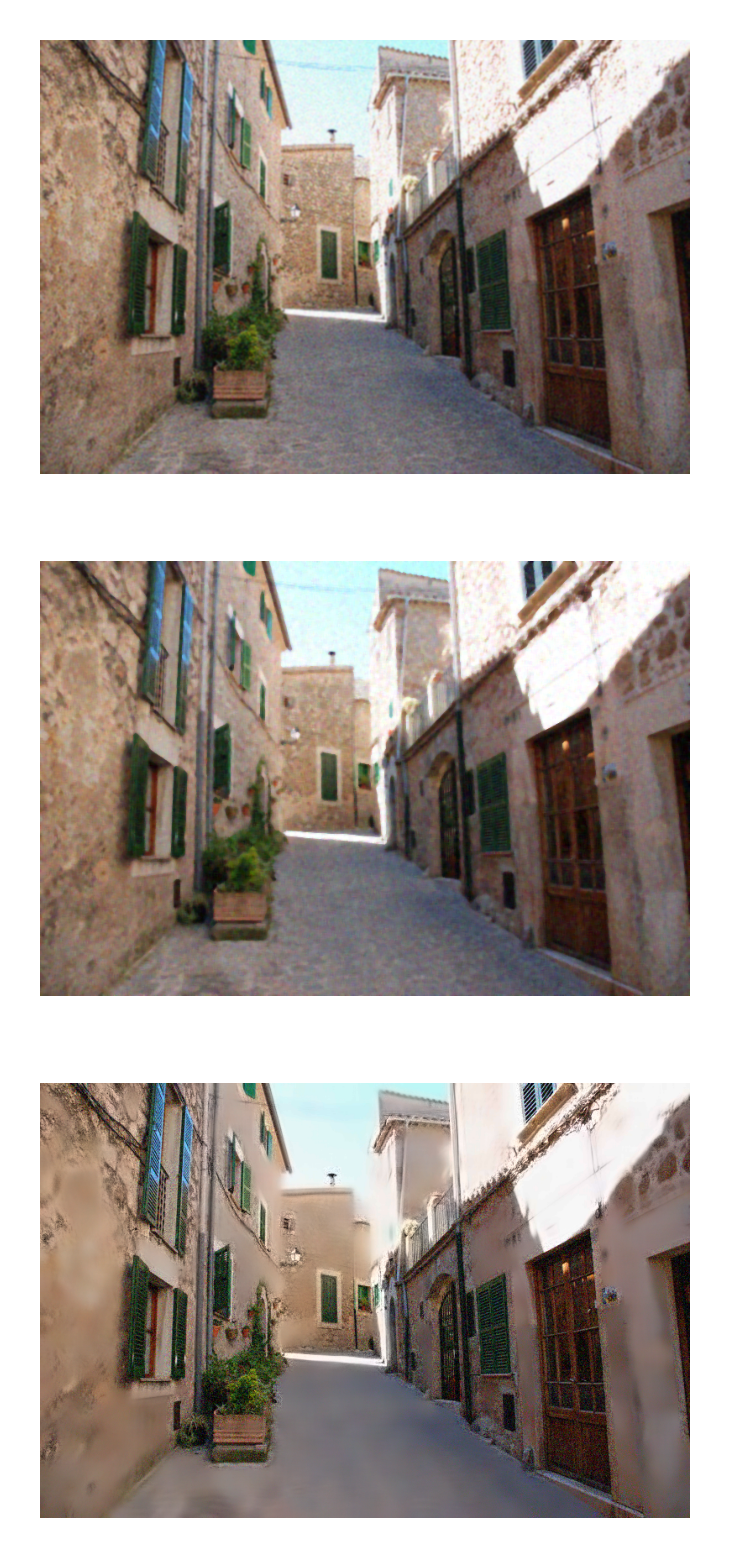

In [2]:
img_noise = cv.imread('images/alley_noisy.jpg')
img = cv.imread('images/alley.jpg')

H, W = img.shape[:2]

img_gauss = cv.GaussianBlur(img_noise, (7, 7), 1, 1) # khử nhiễu bằng gauss
img_median = cv.medianBlur(img_noise, 5) # khử nhiễu bằng median filter
img_non_local = cv.fastNlMeansDenoisingColored(img_noise, 10, 10, 7, 21) # khử nhiễu bằng non-local denoising với các tham số mặc định

plt.rcParams['figure.dpi']=400
plt.subplot(3, 1, 1)
plt.imshow(cv.cvtColor(img_gauss, cv.COLOR_BGR2RGB))
plt.axis("off")
plt.subplot(3, 1, 2)
plt.imshow(cv.cvtColor(img_median, cv.COLOR_BGR2RGB))
plt.axis("off")
plt.subplot(3, 1, 3)
plt.imshow(cv.cvtColor(img_non_local, cv.COLOR_BGR2RGB))
plt.axis("off")

MSE_gauss = ((img_gauss.astype(np.float32) - img.astype(np.float32))**2).sum() / (H*W*3)
MSE_median = ((img_median.astype(np.float32) - img.astype(np.float32))**2).sum() / (H*W*3)
MSE_non_local = ((img_non_local.astype(np.float32) - img.astype(np.float32))**2).sum() / (H*W*3)

PSNR_gauss = 10 * log10(255**2 / MSE_gauss)
PSNR_median = 10 * log10(255**2 / MSE_median)
PSNR_non_local = 10 * log10(255**2 / MSE_non_local)

print(f"PSNR using gauss filter = {PSNR_gauss:.4f}")
print(f"PSNR using median filter = {PSNR_median:.4f}")
print(f"PSNR using non-local means denoising = {PSNR_non_local:.4f}")